In [112]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import plotly.express as px 

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [17]:
df = pd.read_csv(r'C:\Users\14708\Indian - Food Prices\Indian---Food-Prices-\Data\wfp_food_prices_ind.csv')

C:\Users\14708\AppData\Local\Temp\ipykernel_5788\3523316260.py:1: DtypeWarning: Columns (4,5,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\14708\Indian - Food Prices\Indian---Food-Prices-\Data\wfp_food_prices_ind.csv')


In [18]:
df

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,actual,Retail,INR,8.0,0.255
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,actual,Retail,INR,5.0,0.1594
3,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,Retail,INR,13.5,0.4303
4,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,actual,Retail,INR,6.8,0.2167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136666,2023-07-15,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,oil and fats,Oil (soybean),KG,actual,Retail,INR,114.75,1.397
136667,2023-07-15,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,oil and fats,Oil (sunflower),KG,actual,Retail,INR,124.9,1.5205
136668,2023-07-15,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,pulses and nuts,Lentils (masur),KG,actual,Retail,INR,105.4,1.2831
136669,2023-07-15,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,pulses and nuts,Lentils (urad),KG,actual,Retail,INR,115.1,1.4012


In [19]:
df = df.rename(columns={'admin1':'state_name',
                   'admin2':'city_name',
                   'market':'local_market_name'})

In [20]:
df.drop(index=0, inplace=True)

In [24]:
df.head()

,date,state_name,city_name,local_market_name,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,actual,Retail,INR,8.0,0.255
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,actual,Retail,INR,5.0,0.1594
3,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,Retail,INR,13.5,0.4303
4,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,actual,Retail,INR,6.8,0.2167
5,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Wheat,KG,actual,Retail,INR,6.2,0.1976


In [25]:
df.tail()

,date,state_name,city_name,local_market_name,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
136666,2023-07-15,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,oil and fats,Oil (soybean),KG,actual,Retail,INR,114.75,1.397
136667,2023-07-15,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,oil and fats,Oil (sunflower),KG,actual,Retail,INR,124.9,1.5205
136668,2023-07-15,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,pulses and nuts,Lentils (masur),KG,actual,Retail,INR,105.4,1.2831
136669,2023-07-15,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,pulses and nuts,Lentils (urad),KG,actual,Retail,INR,115.1,1.4012
136670,2023-07-15,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,vegetables and fruits,Tomatoes,KG,actual,Retail,INR,125.0,1.5218


In [26]:
df.sample(5)

,date,state_name,city_name,local_market_name,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
25954,2014-11-15,West Bengal,Darjiling,Siliguri,26.716111,88.423611,cereals and tubers,Wheat,KG,actual,Retail,INR,19.0,0.308
119354,2022-11-15,Madhya Pradesh,Jabalpur,Jabalpur,23.181467,79.986407,oil and fats,Oil (groundnut),KG,actual,Retail,INR,175.43,2.166
54864,2018-05-15,Himachal Pradesh,Shimla,Shimla,31.103333,77.172222,vegetables and fruits,Onions,KG,actual,Retail,INR,17.33,0.2561
101229,2022-02-15,Orissa,Sundargarh,Rourkela,22.260423,84.853584,milk and dairy,Milk (pasteurized),L,actual,Retail,INR,47.81,0.6317
83585,2021-05-15,Tamil Nadu,Cuddalore,Cuddalore,11.74828,79.77171,pulses and nuts,Lentils (masur),KG,actual,Retail,INR,98.0,1.337


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136670 entries, 1 to 136670
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   date               136670 non-null  object
 1   state_name         136183 non-null  object
 2   city_name          136183 non-null  object
 3   local_market_name  136670 non-null  object
 4   latitude           136183 non-null  object
 5   longitude          136183 non-null  object
 6   category           136670 non-null  object
 7   commodity          136670 non-null  object
 8   unit               136670 non-null  object
 9   priceflag          136670 non-null  object
 10  pricetype          136670 non-null  object
 11  currency           136670 non-null  object
 12  price              136670 non-null  object
 13  usdprice           136670 non-null  object
dtypes: object(14)
memory usage: 14.6+ MB


In [51]:
# Updating dtypes
df[['price', 'usdprice', 'latitude', 'longitude']]=df[['price', 'usdprice', 'latitude', 'longitude']].astype('float')
df['date'] = pd.to_datetime(df['date'])

In [29]:
# Check for duplicates
df.duplicated().sum()

0

In [55]:
# Seggregating columns on the basis of dtypes
categorical_columns = df.select_dtypes('object').columns
numerical_columns = df.select_dtypes(np.number).columns

In [78]:
# Check for null values
print(df.isna().sum())
# It seems that there are 487 null values in 4 columns - state_name, city_name, latitude, longitude


date                   0
state_name           487
city_name            487
local_market_name      0
latitude             487
longitude            487
category               0
commodity              0
unit                   0
priceflag              0
pricetype              0
currency               0
price                  0
usdprice               0
dtype: int64


In [92]:
'''It seems that all the 487 values are not differentiated in terms of rows, 
    Will Explore (local_market_name) column to scope data recovery'''
null_mask = df.isnull().any(axis=1)
null_rows = df[null_mask]

# Value counts of local_market_name
null_rows['local_market_name'].value_counts()

# Cannot be gained any information from local_market_name column, chance of possible null data removal. Will check columns- category & commodity
print('null rows category value count:' ,null_rows['category'].value_counts().count())
print('null rows commodity value count:' ,null_rows['commodity'].value_counts().count())
# Check for value counts of category & commodity of entire dataset
print('rows category value count:' ,df['category'].value_counts().count())
print('rows commodity value count:' ,df['commodity'].value_counts().count())

# Removing null values
df.dropna(inplace=True)

null rows category value count: 6
null rows commodity value count: 21
rows category value count: 6
rows commodity value count: 23


In [93]:
# Statistical Description
df.describe()

,date,latitude,longitude,price,usdprice
count,136183,136183.000000,136183.000000,136183.000000,136183.000000
mean,2018-05-23 02:56:05.970789376,22.423100,80.234349,97.040849,1.454150
min,1994-01-15 00:00:00,8.506944,69.666690,2.500000,0.056700
25%,2015-12-15 00:00:00,18.866667,76.283333,27.000000,0.394300
50%,2020-05-15 00:00:00,23.350000,78.157870,50.210000,0.724900
75%,2022-03-15 00:00:00,26.716111,84.853584,107.000000,1.481400
max,2023-07-15 00:00:00,32.553589,94.116667,4910.000000,88.773000
std,NaN,6.186900,5.650442,233.095771,3.991296


In [94]:
df['price'].sort_values(ascending=False)

68653    4910.00
71360    4900.00
70693    4900.00
69996    4900.00
69317    4900.00
          ...   
2446        3.00
3984        2.83
2213        2.79
2147        2.69
2204        2.50
Name: price, Length: 136183, dtype: float64

In [95]:
df['usdprice'].sort_values(ascending=False)

9035    88.7730
9066    86.4299
8910    77.8307
8964    75.9185
9184    75.0057
         ...   
2213     0.0625
2147     0.0616
3304     0.0614
3984     0.0596
2204     0.0567
Name: usdprice, Length: 136183, dtype: float64

In [97]:
df[categorical_columns]

,state_name,city_name,local_market_name,category,commodity,unit,priceflag,pricetype,currency
1,Delhi,Delhi,Delhi,cereals and tubers,Rice,KG,actual,Retail,INR
2,Delhi,Delhi,Delhi,cereals and tubers,Wheat,KG,actual,Retail,INR
3,Delhi,Delhi,Delhi,miscellaneous food,Sugar,KG,actual,Retail,INR
4,Gujarat,Ahmadabad,Ahmedabad,cereals and tubers,Rice,KG,actual,Retail,INR
5,Gujarat,Ahmadabad,Ahmedabad,cereals and tubers,Wheat,KG,actual,Retail,INR
...,...,...,...,...,...,...,...,...,...
136666,West Bengal,West Midnapore,Kharagpur,oil and fats,Oil (soybean),KG,actual,Retail,INR
136667,West Bengal,West Midnapore,Kharagpur,oil and fats,Oil (sunflower),KG,actual,Retail,INR
136668,West Bengal,West Midnapore,Kharagpur,pulses and nuts,Lentils (masur),KG,actual,Retail,INR
136669,West Bengal,West Midnapore,Kharagpur,pulses and nuts,Lentils (urad),KG,actual,Retail,INR


In [125]:
# Checking value counts for various categorical columns
df.state_name.value_counts()

state_name
Uttar Pradesh          10788
Bihar                   9841
Madhya Pradesh          9111
Tamil Nadu              8206
Orissa                  8123
Maharashtra             7689
Karnataka               7616
Rajasthan               6536
Gujarat                 5886
Haryana                 5768
West Bengal             5714
Kerala                  5649
Himachal Pradesh        4892
Punjab                  4774
Telangana               4297
Jharkhand               3945
Delhi                   3157
Andhra Pradesh          2845
Uttarakhand             2843
Meghalaya               2794
Chhattisgarh            2099
Assam                   1936
Andaman and Nicobar     1754
Nagaland                1749
Tripura                 1686
Chandigarh              1623
Puducherry              1454
Mizoram                 1389
Goa                     1383
Sikkim                   377
Manipur                  259
Name: count, dtype: int64

<BarContainer object of 6 artists>

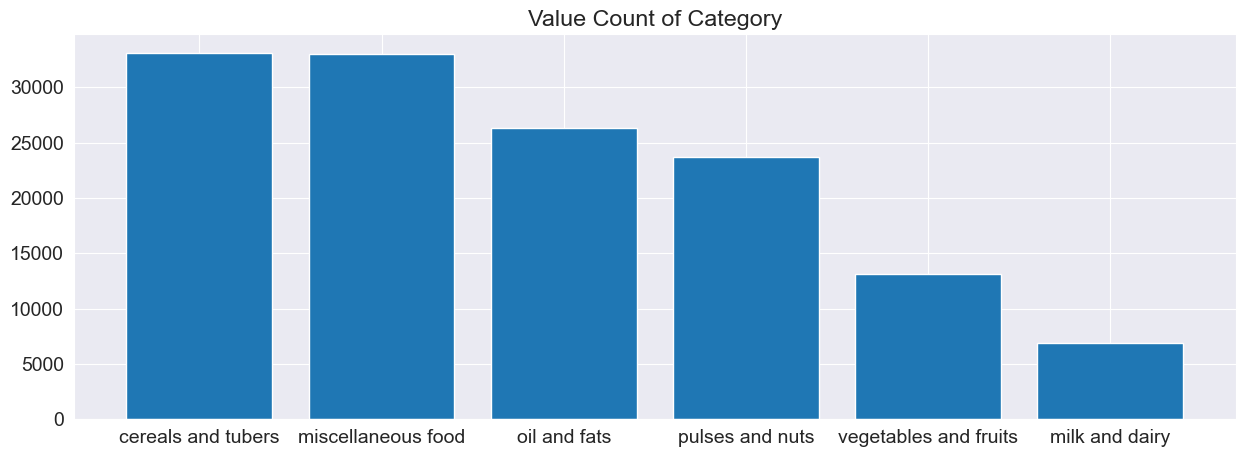

In [135]:
# Category
plt.figure(figsize=(15,5))
plt.title('Value Count of Category')
plt.bar(df['category'].unique(), df['category'].value_counts())

In [137]:
# Unit Value Count
df['unit'].value_counts()

unit
KG        127500
L           6898
100 KG      1785
Name: count, dtype: int64

In [140]:
# Price flag value count
print(df['priceflag'].value_counts())

# Makes no sense to keep this column
df.drop(columns='priceflag', inplace=True)

priceflag
actual    136183
Name: count, dtype: int64


In [142]:
# Price Type value counts
df['pricetype'].value_counts()

pricetype
Retail       134398
Wholesale      1785
Name: count, dtype: int64

In [144]:
# Currency Type Value Counts
df['currency'].value_counts()

# Makes no sense to keep this column
df.drop(columns='currency', inplace=True)

In [147]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month

#### What is the most expensive commodity of every year?

In [193]:
results = df.groupby(['year', 'commodity'], as_index=False)['price'].mean()

max_index = results.groupby('year')['price'].idxmax()

most_expensive_commodity_per_year = results.iloc[max_index]

print(most_expensive_commodity_per_year)

     year      commodity       price
0    1994  Oil (mustard)   35.850000
4    1995           Rice    8.033333
6    1996  Oil (mustard)   39.422764
10   1997           Rice    9.507250
12   1998           Rice   10.040863
14   1999           Rice   11.065642
20   2000           Rice  203.177265
27   2001           Rice  300.536863
36   2002          Wheat  220.530571
41   2003           Rice  184.284257
48   2004           Rice  190.351922
57   2005          Wheat  212.574803
64   2006          Wheat  254.031923
71   2007          Wheat  338.213704
78   2008          Wheat  374.380776
86   2009          Wheat  330.761048
94   2010          Wheat  366.839173
101  2011           Rice  205.907329
117  2012          Sugar  258.301159
132  2013           Rice  242.141150
150  2014           Rice  242.197637
172  2015           Rice  221.235816
195  2016           Rice  224.764091
218  2017           Rice  258.389982
241  2018           Rice  284.034590
264  2019           Rice  379.972649
2

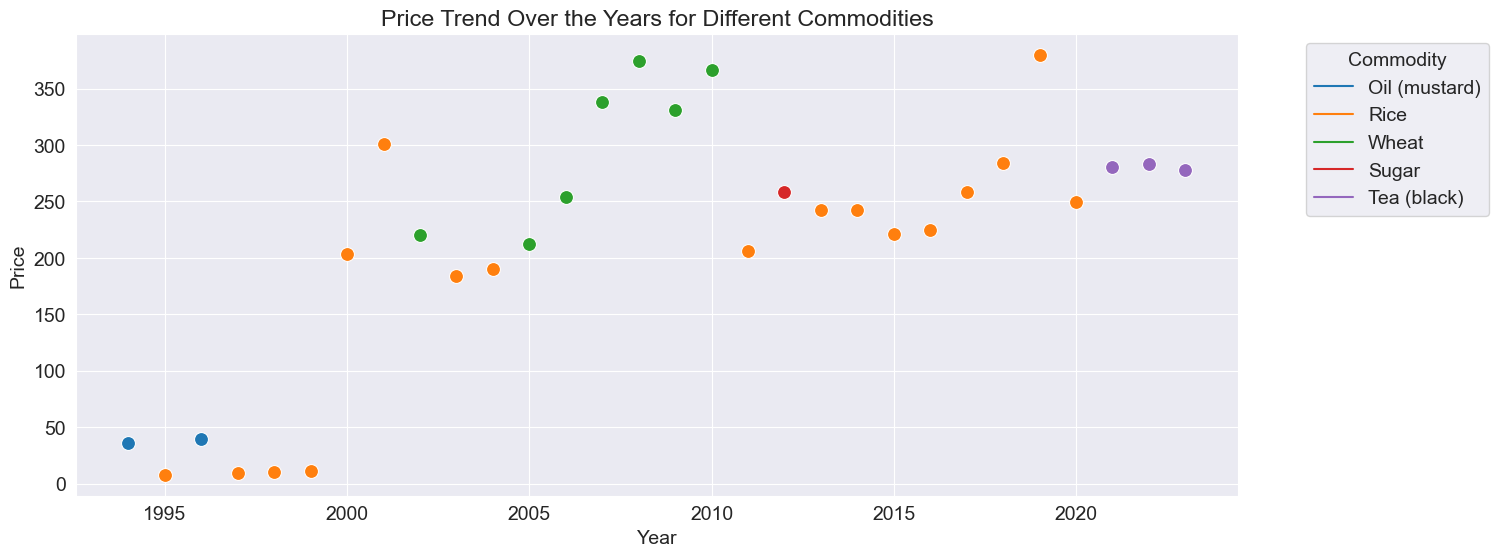

In [202]:
plt.figure(figsize=(15, 6))

sns.lineplot(x='year', y='price', hue='commodity', data=most_expensive_commodity_per_year, marker='o', linestyle='', markersize=10)

plt.title('Price Trend Over the Years for Different Commodities')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(title='Commodity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

#### What is the least expensive commodity of every year?

In [201]:
results = df.groupby(['year', 'commodity'], as_index=False)['price'].mean()

min_index = results.groupby('year')['price'].idxmin()

least_expensive_commodity_per_year = results.iloc[min_index]

print(least_expensive_commodity_per_year)

     year       commodity      price
3    1994           Wheat   6.039535
5    1995           Wheat   5.840909
9    1996           Wheat   7.446392
11   1997           Wheat   8.376667
13   1998           Wheat   8.311628
15   1999           Wheat   8.190984
19   2000        Potatoes   5.243000
26   2001        Potatoes   6.614687
32   2002          Onions   6.325758
40   2003        Potatoes   6.276471
47   2004        Potatoes   7.161852
54   2005        Potatoes   8.614400
60   2006          Onions   7.257200
68   2007        Potatoes  10.665769
75   2008        Potatoes   8.661786
83   2009        Potatoes  13.644828
91   2010        Potatoes  12.221765
100  2011        Potatoes  12.133243
116  2012  Salt (iodised)  13.036199
133  2013  Salt (iodised)  13.872515
151  2014  Salt (iodised)  14.688447
173  2015  Salt (iodised)  15.199685
196  2016  Salt (iodised)  15.727308
217  2017        Potatoes  15.321735
242  2018  Salt (iodised)  15.968552
265  2019  Salt (iodised)  15.989157
2

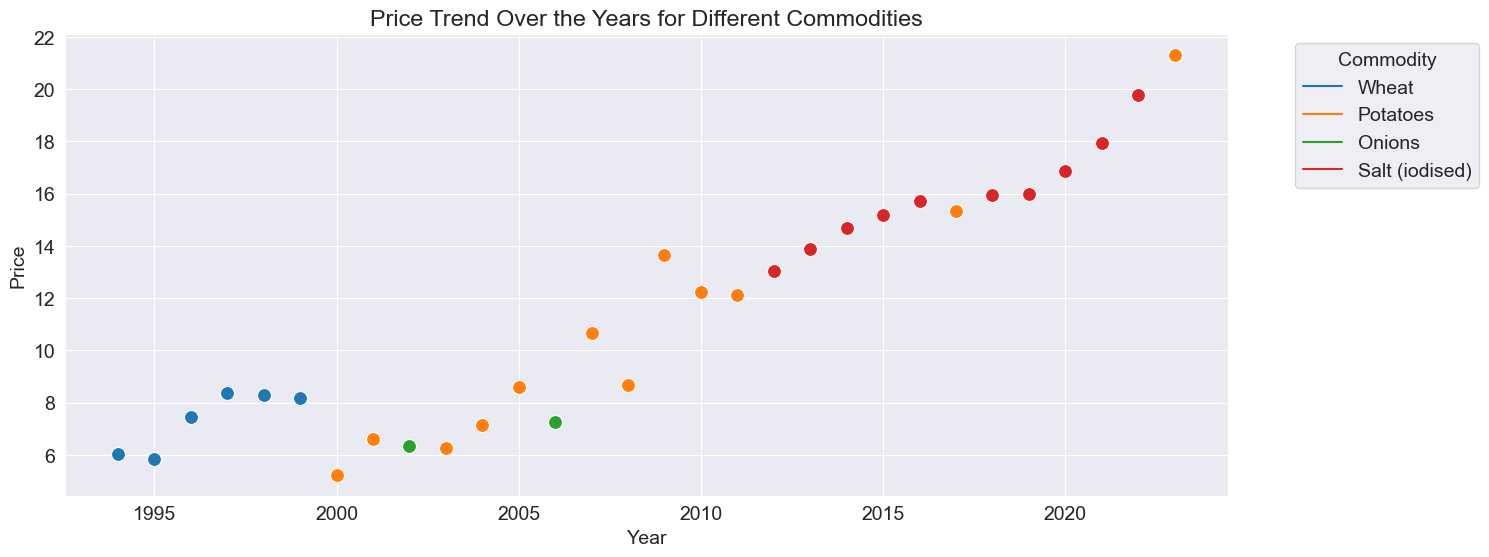

In [204]:
plt.figure(figsize=(15, 6))

sns.lineplot(x='year', y='price', hue='commodity', data=least_expensive_commodity_per_year, marker='o', linestyle='', markersize=10)

plt.title('Price Trend Over the Years for Different Commodities')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(title='Commodity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

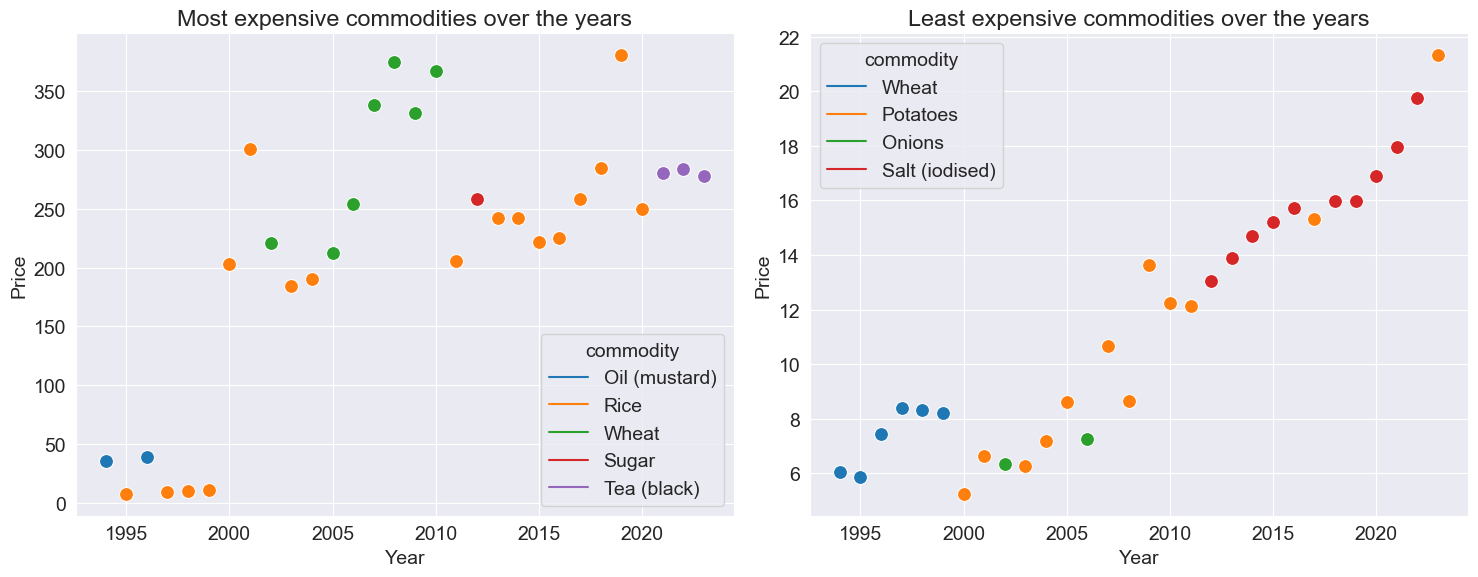

In [245]:
fig, axes = plt.subplots(1,2, figsize=(15, 6), sharey=False)

# Plotting fist plot
sns.lineplot(x='year', y='price', hue='commodity', data= most_expensive_commodity_per_year, marker='o', linestyle='', markersize=10, ax=axes[0])
axes[0].set_title('Most expensive commodities over the years')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Price')
axes[0].grid(True)

# Plotting second plot
sns.lineplot(x='year', y='price', hue='commodity', data= least_expensive_commodity_per_year, marker='o', linestyle='', markersize=10, ax=axes[1])
axes[1].set_title('Least expensive commodities over the years')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Price')
axes[1].grid(True)

plt.tight_layout()

plt.show()